<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울 지역(강동, 강서, 강남, 강북) 다중 분류하기

### 문제 정의
- 서울 지역(구)의 경도와 위도 정보를 학습하여 임의로 지정된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 모델 구현
- 특정 지역이 강동구 or 강서구 or 강남구 or 강북구인지 알아내는 모델 구현

### 데이터 획득
- 테스트 데이터에 붙인 레이블의 의미

  distinct : 행정 구역(서초구, 송파구 등, 서울의 단위 지역 분류)

  dong : 구(distinct)보다 작은 행정구역(대치동, 도곡동 등)

  latitude : 위도

  longitude : 경도

  label : 한강 기준으로 동,서,남,북으로 구분한 지역 명칭(강동, 강서, 강남, 강북)

In [ ]:
import pandas as pd

In [67]:
# 데이터 목록
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [68]:
# 서울의 대표적인 동 위치 데이터
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [ ]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


### 학습 데이터의 레이블 분포

In [ ]:
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

### 데이터 시각화

In [ ]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distinct Visualization in 2d place')

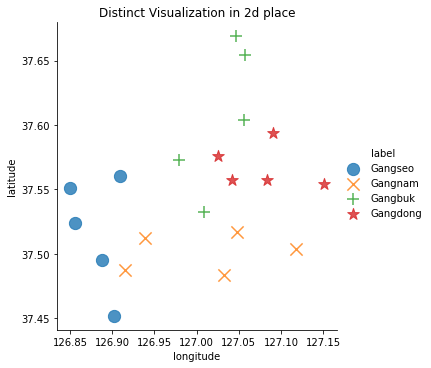

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('longitude','latitude', data = train_df, fit_reg = False,
           scatter_kws = {"s":150},
           markers = ['o','x','+','*'],
           hue = 'label')

#title
plt.title("Distinct Visualization in 2d place")

### 데이터 다듬기
- 구, 동이름이 학습이나 테스트에 별 영향을 미치지 않음
- 학습 및 테스트에 필요없는 구, 동 제거

In [69]:
train_df.drop(['district'], axis = 1, inplace = True)
test_df.drop(['dong'], axis = 1, inplace = True)

X_train = train_df[['longitude','latitude']]
y_train = train_df['label']

X_test = test_df[['longitude','latitude']]
y_test = test_df['label']

### 모델 학습

In [ ]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 모델 학습
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train) # 강동, 강서, 강남, 강북을 0,1,2,3으로 변환
clf = tree.DecisionTreeClassifier(random_state = 35).fit(X_train, y_encoded)

In [46]:
# 학습된 의사결정트리 시각화
def display_decision_surface(clf, X, y):
  
  # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
  x_min = X.longitude.min() - 0.01
  x_max = X.longitude.max() + 0.01
  y_min = X.latitude.min() - 0.01
  y_max = X.latitude.max() + 0.01
  
  # 파라미터 설정
  n_classes = len(le.classes_) # 구역 개수(강북, 강남, 강동, 강서)
  plot_colors = 'rywb'
  plot_step = 0.001

  xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step)) # 격자 그리드 만들기
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx,yy,Z, cmap = plt.cm.RdYlBu)

  # 학습 데이터를 챠트에 표시
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
                c=color, label=le.classes_[i],
                cmap=plt.cm.RdYlBu, edgecolor = 'black', s = 200)
    
  plt.title("Decision surface of a decision tree", fontsize = 16)
  # 챠트 기호 설명
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad = 0, fontsize=14)
  plt.xlabel('longitude', fontsize = 16)
  plt.ylabel('latitude', fontsize=16)
  # 챠트 크기 설정
  plt.rcParams['figure.figsize'] = [7,5]
  plt.rcParams['font.size'] = 14
  plt.rcParams['xtick.labelsize'] = 14
  plt.rcParams['ytick.labelsize'] = 14
  plt.show()

### 파라미터 없이 학습한 모델의 결정 표면 시각화
- 의사결정 트리는 과대적합 되기 쉬운 모델
- 사이킷런의 의사결정 트리는 과대적합을 피할 수 있도록 별도의 파라미터를 제공하지만 파라미터를 설정하지 않으면 모델 과대적합 가능성 높음

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


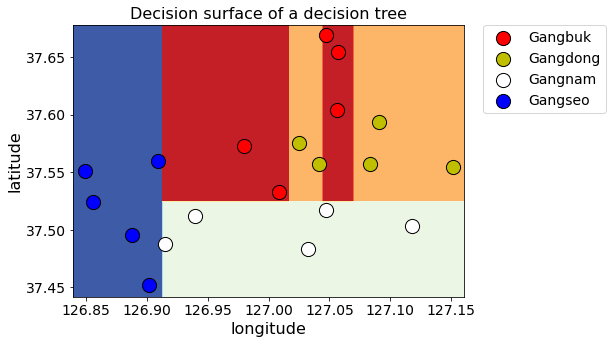

In [47]:
# 파라미터 설정 없이 학습 데이터 학습
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

display_decision_surface(clf, X_train, y_encoded)

학습 데이터에 너무 치우치게 학습되어 과대적합되었다고 판단 가능

과대적합 피하기 위해 별도의 파라미터 설정
  
  - max_depth : 트리의 최대 한도 깊이
  - min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 개수
  - min_samples_leaf : 리프 노드의 최소 데이터 개수
  - random_state : 동일한 정수를 입력했을 때 학습 결과를 항상 같게 만들어주는 파라미터

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


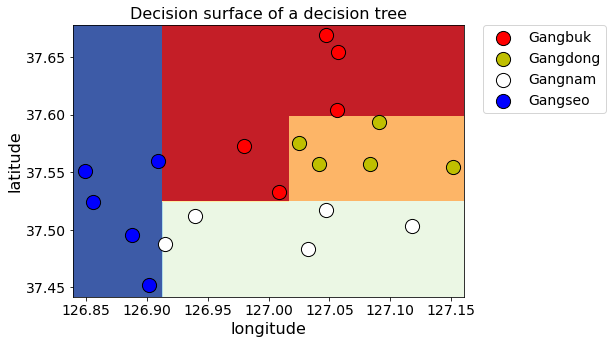

In [50]:
clf = tree.DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2,
                                  random_state = 70).fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded)

### 의사결정 트리 시각화
- 의사결정 트리의 최대 장점은 예측이 이뤄진 과정을 쉽게 시각화해서 특별한 수학적 지식 없이도 이해하기 쉬움

    - gini : 불순도 척도. 0이면 모든 샘플이 하나의 분류값을 갖으며, 1에 가까울수록 여러 분류값이 한 노드에 존재

    - samples : 노드 안에 들어 있는 데이터의 갯수
    - value : 분류값 별 데이터의 갯수
    - class : 분류값

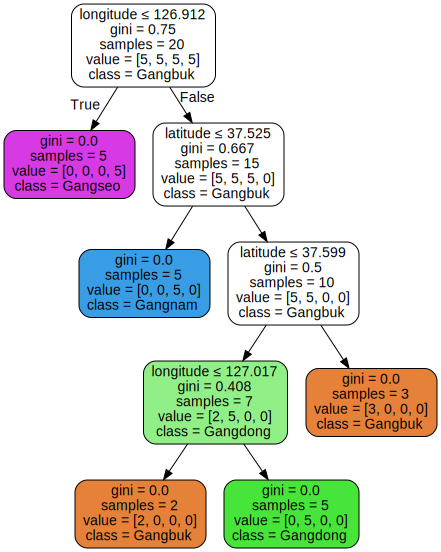

In [75]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render('seoul') # 결과 'seoul'이라는 파일명으로 저장
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = ['longitude', 'latitude'],  # 구분 기준
                                class_names = ['Gangbuk', "Gangdong", "Gangnam", "Gangseo"], # 구분 결과
                                filled = True, rounded = True, # 모양
                                special_characters = True) # 글자

graph = graphviz.Source(dot_data)
graph

### 모델 테스트


In [53]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [54]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])) )

accuracy : 1.0


In [55]:
comparison = pd.DataFrame({'prediction' : le.classes_[pred],
                           'ground_truth' : y_test.values.ravel()})
comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
